In [2]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from pandas import read_csv
import matplotlib.patheffects as pe
from matplotlib.colors import LinearSegmentedColormap


/Users/jimig/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list):
    '''
    Generate the art for a science goal card.
    
    Parameters
    -----------
    title_text: str
        Title of Card
    wavelength: str
        Wavlength of card ('infrared','optical', or 'ultraviolet')
    pvalue: str
        point value of card
    flavor_text: str
        Description/flavor text of goal
    icon_style: str
        type of icon style for bottom of card ('3', '4', '2con')
        '3' for 3 equal spaced
        '4' for 4 equal spaced
        '2con' for 2 connected bubble pairs
        '1con2' for one bubble + 2 disconnected pairs 
    icon_list: list
        list of icons to fill the bubbles with
    
    '''
    fig, ax = plt.subplots()
    fig.set_size_inches((2.5,3.5))

    
    # Wavelength Box
    if wavelength.lower() == 'optical':
        wl_cmap = plt.cm.rainbow
    elif wavelength.lower() == 'infrared':
        #wl_cmap = plt.cm.gist_heat
        wl_cmap = LinearSegmentedColormap.from_list("", ['gold','red','darkred','k'])

    elif wavelength.lower() == 'ultraviolet':
        wl_cmap = plt.cm.cool
        #wl_cmap = LinearSegmentedColormap.from_list("", ["cyan","darkviolet","violet"])


    plt.imshow([[0.,1], [0.,1]], 
               cmap = wl_cmap, 
               interpolation = 'bicubic',extent=(0,1000,1000,1150))
    ax.text(500, 1075, f'{wavelength.title()} Science Goal', ha='center', va='center', color='white',
             fontsize=10, font='Georgia', fontweight='bold')


    # Title Text
    if len(title_text)<15:
        ax.text(500, 1250, f'{title_text}', ha='center', va='center', color='k',
                 fontsize=16, font='silom', fontweight='bold')
    else:
        ax.text(500, 1250, f'{title_text}', ha='center', va='center', color='k',
                 fontsize=10, font='silom', fontweight='bold')

    # Flavor Text
    ax.text(100, 850, f'{flavor_text}', 
            ha='left', va='center', color='k', wrap= True,
                 fontsize=8, font='Georgia')


    # Big circle for points
    circle1 = plt.Circle((500, 500), 200, color='lightgray', zorder=1)
    ax.add_patch(circle1)
    plt.text(500,475, f'{pvalue}', ha='center', va='center', fontsize=40, font='silom')
    #plt.text(500,365, 'points', ha='center', va='center', fontsize=8, font='georgia')

    
    # Add Circles for Icons
    if icon_style=='2con':
        N = 4
        radius = 100
        spacing = (1000-(N*radius*2))/(N+1)
        xs = [175,325,675,825]
        for i in range(4):
            x = xs[i]
            y = 150
            circle = plt.Circle((x,y), radius, color='lightgray', zorder=1)
            ax.add_patch(circle)
            icon = Image.open(f'icons/{icon_list[i]}.png').resize((150,150))
            ax.imshow(icon, extent=(x-75,x+75,y-75,y+75),zorder=3)
            
    elif icon_style=='1con2':
        N = 4
        radius = 100
        spacing = (1000-(N*radius*2))/(N+1)
        xs = [175,325,600,850]
        for i in range(4):
            x = xs[i]
            y = 150
            circle = plt.Circle((x,y), radius, color='lightgray', zorder=1)
            ax.add_patch(circle)
            icon = Image.open(f'icons/{icon_list[i]}.png').resize((150,150))
            ax.imshow(icon, extent=(x-75,x+75,y-75,y+75),zorder=3)
    else:
        N = int(icon_style)
        radius = 100
        spacing = (1000-(N*radius*2))/(N+1)
        for i in range(N):
            x = ((i+1)*spacing)+((2*i+1)*radius)
            y = 150
            circle = plt.Circle((x,y), radius, color='lightgray', zorder=1)
            ax.add_patch(circle)
            icon = Image.open(f'icons/{icon_list[i]}.png').resize((150,150))
            ax.imshow(icon, extent=(x-75,x+75,y-75,y+75),zorder=3) 

    # Additional Formatting
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1400)
    ax.set_axis_off()
    plt.axis('off')
    
    plt.savefig(f'final_cards/GOAL_{title_text}.png', bbox_inches='tight', pad_inches=0, dpi=200)
    plt.show()

    

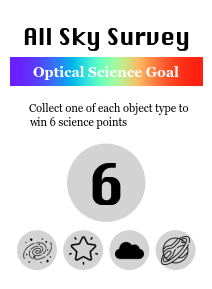

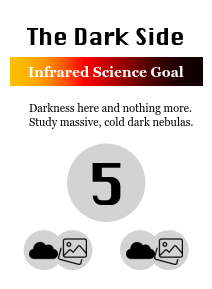

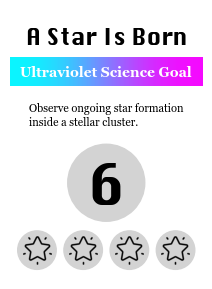

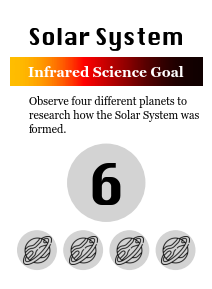

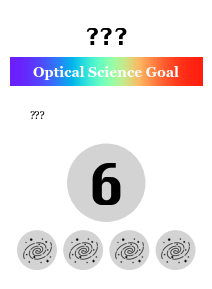

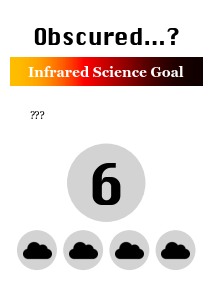

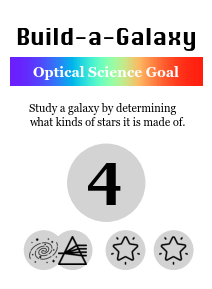

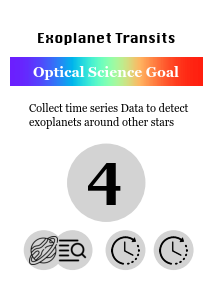

In [5]:
title_text = 'All Sky Survey'
wavelength = 'optical'
pvalue = 6
flavor_text = 'Collect one of each object type to \nwin 6 science points'
icon_style = '4'
icon_list = ['galaxy', 'star', 'nebula', 'planet']

make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)


title_text = 'The Dark Side'
wavelength = 'infrared'
pvalue=5
flavor_text = 'Darkness here and nothing more.\nStudy massive, cold dark nebulas.'
icon_style = '2con'
icon_list = ['nebula','image','nebula','image']

make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)


title_text = 'A Star Is Born'
wavelength = 'ultraviolet'
pvalue=6
flavor_text = 'Observe ongoing star formation \ninside a stellar cluster.'
icon_style = '4'
icon_list = ['star','star','star','star']

make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)


title_text = 'Solar System'
wavelength = 'Infrared'
pvalue=6
flavor_text = 'Observe four different planets to research how the Solar System was formed.'
icon_style = '4'
icon_list = ['planet','planet','planet','planet']

make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)


title_text = '???'
wavelength = 'Optical'
pvalue=6
flavor_text = '???'
icon_style = '4'
icon_list = ['galaxy','galaxy','galaxy','galaxy']
make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)


title_text = 'Obscured...?'
wavelength = 'Infrared'
pvalue=6
flavor_text = '???'
icon_style = '4'
icon_list = ['nebula','nebula','nebula','nebula']

make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)


title_text = 'Build-a-Galaxy'
wavelength = 'Optical'
pvalue=4
flavor_text = 'Study a galaxy by determining\nwhat kinds of stars it is made of.'
icon_style = '1con2'
icon_list = ['galaxy','spectrum','star','star']

make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)


title_text = 'Exoplanet Transits'
wavelength = 'Optical'
pvalue=4
flavor_text = 'Collect time series Data to detect exoplanets around other stars'
icon_style = '1con2'
icon_list = ['planet','catalog','timeseries','timeseries']

make_goal_card(title_text, wavelength, pvalue, flavor_text, icon_style, icon_list)
